<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/03_Intro_to_computer_vision_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolution Neural Networks and Computer Vision with Tensor Flow

## Get the data

the images are from the Food101 dataset from kaggle (https://www.kaggle.com/dansbecker/food-101)

the dataset has been modified using image data modification notebook (https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)



In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-13 03:29:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.251.6.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   155MB/s    in 0.7s    

2022-02-13 03:29:52 (155 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

visualizing many samples of the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 13 03:29 .
drwxr-xr-x 1 root root 4096 Feb 13 03:29 ..
drwxr-xr-x 4 root root 4096 Feb 13 03:29 test
drwxr-xr-x 4 root root 4096 Feb 13 03:29 train


In [7]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, lets get the class names programmatically

In [8]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #created a list of class_names from subdirectory 
class_names=class_names
print(class_names)

['pizza' 'steak']


In [29]:
#let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory 
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['274945.jpg']
Image shape: (512, 382, 3)


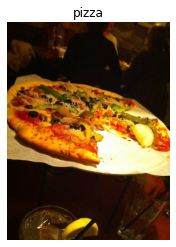

In [10]:
# view a random image from the training dataset
img =view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[  9,   4,   1],
        [ 12,   7,   4],
        [ 13,   8,   5],
        ...,
        [ 60,  22,   0],
        [ 57,  16,   0],
        [ 55,  12,   0]],

       [[  9,   4,   1],
        [ 11,   6,   3],
        [ 12,   7,   4],
        ...,
        [ 60,  22,   0],
        [ 56,  18,   0],
        [ 55,  13,   0]],

       [[  9,   4,   1],
        [ 11,   6,   3],
        [ 11,   6,   3],
        ...,
        [ 58,  22,   0],
        [ 56,  20,   0],
        [ 55,  16,   0]],

       ...,

       [[  8,   7,   2],
        [  7,   6,   1],
        [  9,   6,   1],
        ...,
        [104,  25,   8],
        [ 97,  18,   1],
        [ 98,  17,   0]],

       [[  7,   6,   1],
        [  6,   5,   0],
        [  8,   5,   0],
        ...,
        [104,  25,   8],
        [ 98,  19,   2],
        [ 98,  17,   0]],

       [[  6,   5,   0],
        [  6,   5,   0],
        [  6,   5,   0],
        ...,
        [105,  26,   

In [12]:
# view the image shape
img.shape # return width, height, colour channels

(512, 382, 3)

In [13]:
#get all the pixel values between 0 and 1
img/255.

array([[[0.03529412, 0.01568627, 0.00392157],
        [0.04705882, 0.02745098, 0.01568627],
        [0.05098039, 0.03137255, 0.01960784],
        ...,
        [0.23529412, 0.08627451, 0.        ],
        [0.22352941, 0.0627451 , 0.        ],
        [0.21568627, 0.04705882, 0.        ]],

       [[0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471],
        [0.04705882, 0.02745098, 0.01568627],
        ...,
        [0.23529412, 0.08627451, 0.        ],
        [0.21960784, 0.07058824, 0.        ],
        [0.21568627, 0.05098039, 0.        ]],

       [[0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471],
        [0.04313725, 0.02352941, 0.01176471],
        ...,
        [0.22745098, 0.08627451, 0.        ],
        [0.21960784, 0.07843137, 0.        ],
        [0.21568627, 0.0627451 , 0.        ]],

       ...,

       [[0.03137255, 0.02745098, 0.00784314],
        [0.02745098, 0.02352941, 0.00392157],
        [0.03529412, 0

## An end to end example

let's build a convolutional neural network to find pattern in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

p/s: make sure to use runtime type GPU

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#set random seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#build CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 255ms/step - loss: 0.5778 - accuracy: 0.6880 - val_loss: 0.4248 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4390 - accuracy: 0.8027 - val_loss: 0.3610 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3939 - accuracy: 0.8213 - val_loss: 0.3485 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3694 - accuracy: 0.8420 - val_loss: 0.3036 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3333 - accuracy: 0.8580 - val_loss: 0.3040 - val_accuracy: 0.8800


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [16]:
tf.random.set_seed(42)

#create a model to replicate
model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile model
model_2.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2= model_2.fit(train_data,
            epochs=5,
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 1.5601 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than model_1, model_2 performs terribly

In [25]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                  epochs=5,
                  validation_data=valid_data,
                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 3.1345 - accuracy: 0.6287 - val_loss: 0.5090 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.9742 - accuracy: 0.6773 - val_loss: 0.6743 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.7157 - accuracy: 0.7233 - val_loss: 0.6533 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4720 - accuracy: 0.7840 - val_loss: 0.4509 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4661 - accuracy: 0.8027 - val_loss: 0.5278 - val_accuracy: 0.7540


In [26]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification 

1. Become one with data (visualize)

2. Preprocess the data(prepared it fdor the model, main step is scaling/normalize and turn it into batches)

3. create the model

4. fit the model

5. evaluate the model

6. adjust the different parameters and improve the model

7. repeat until satisfied (experiment)

### 1. Become one with the data

['1889336.jpg']
Image shape: (512, 511, 3)
['970073.jpg']
Image shape: (512, 512, 3)


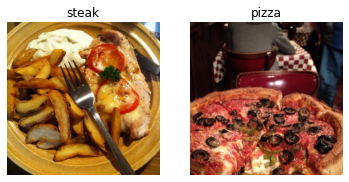

In [30]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [36]:
#define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir= "pizza_steak/test/"

next step is to turn our data into **batches**.

a batch is a small subset of data. rather than look at all -10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?
because 32 is good for your health

In [32]:
!nvidia-smi

Sun Feb 13 04:15:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    58W / 149W |   1304MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [40]:
#Load on our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
# get a sample of a train data batch
images, labels = train_data.next() # get the "next"batch of images/labels in tratn_data
len(images), len(labels)

(32, 32)

In [44]:
#how many batches are there?
len(train_data)

47

In [45]:
1500/32

46.875

In [46]:
#get the first 2 images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

In [48]:
images[7].shape

(224, 224, 3)

In [49]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (star with a baseline)

A baseline is  a relatively simple model or existing result that u setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note** In deep learning, there is almost an infinite amount of architectures u could create. so one of the best way to get started is to start woth something simple and see if it works on ur data and then introduce complexity as required (e.g look at which current model is performing best in the field for ur problem).

In [51]:
#make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [53]:
#create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
                      Conv2D(filters=10, #numeb rof sliding windows, higher is for complex model
                             kernel_size=3, # the size of the sliding window
                             strides=1, #the size of the step the sliding window takes across an input
                             padding="valid", #if same, output shape is same as input shape, if valid, output is compress
                             activation="relu",
                             input_shape=(224,224,3)), #input layer (specify input shape)
                      Conv2D(10,3, activation="relu"),
                      Conv2D(10,3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])